In [518]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns

%matplotlib inline

In [519]:
import os

df = pd.read_csv(os.path.join("data", "lahman", "baseballdatabank-master", "core", "Pitching.csv"))
df = df[df['yearID'] >= 2011]
print("# with ERA: {}".format(len(df[~df['ERA'].isnull()])))
print("# 1 or more games: {}.".format(len(df[df['G'] > 0])))

df = pd.read_csv(os.path.join("data", "db", "Performance.csv"))
print("Performance")
print("# with ERA: {}".format(len(df[~df['Pitching_ERA'].isnull()])))


# with ERA: 3703
# 1 or more games: 3710.
Performance
# with ERA: 40778


C:\Users\Owner\Anaconda3\envs\data_analysis\lib\site-packages\IPython\core\interactiveshell.py:2705: DtypeWarning: Columns (65,73,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [565]:

df = pd.read_csv(os.path.join("data", "db", "Observations.csv"))

## Cleaning and Feature Selection

In [566]:
# No longer needed using the Lahman database (was for scraped salaries)
#df['Annual Salary'] = df['Annual Salary'].str.replace("$", "")
#df['Annual Salary'] = df['Annual Salary'].str.replace(",", "")
#df['Annual Salary'] = pd.to_numeric(df['Annual Salary'])

df['Log Annual Salary'] = np.log(df['Annual Salary'])
#df.head()

# Average Player Salary by year
df_gb_year = df.groupby('Salary Year')
counts = df_gb_year.count()
average_player_salaries = df_gb_year.sum()['Annual Salary'] / df_gb_year.count()['Annual Salary']
avg_player_salaries_df = average_player_salaries.reset_index()
avg_player_salaries_df.columns = ['Salary Year', 'Average Annual Player Salary']
df = pd.merge(df, avg_player_salaries_df, on='Salary Year')

df['Scaled Salary'] = df['Annual Salary'] / df['Average Annual Player Salary']

# Pitching metrics
# Wins per Inning Pitched. This might be more useful than wins alone.
df['Pitching_Career_WPIP'] = df['Pitching_Career_W'] / df['Pitching_Career_IP'] 

# Starter or reliever? Games Started Per Full Games Played
df['Pitching_Career_GSPFGP']= df['Pitching_Career_GS'] * 9 / df['Pitching_Career_IP']   
df.head()



,Player Id,Salary Year,Annual Salary,Salary Team,Batting_2B.Year-1,Batting_3B.Year-1,Batting_AB.Year-1,Batting_AVG.Year-1,Batting_BB.Year-1,Batting_CS.Year-1,...,Player Id.1,teamID 1.Year-1,teamID 2.Year-1,teamID 3.Year-1,teamID 4.Year-1,Log Annual Salary,Average Annual Player Salary,Scaled Salary,Pitching_Career_WPIP,Pitching_Career_GSPFGP
0,blanche01,2011,1000000,ARI,5.0,0.0,130.0,0.215385,11.0,0.0,...,blanche01,NYN,NaN,NaN,NaN,13.815511,3.379370e+06,0.295913,NaN,NaN
1,bloomwi01,2011,900000,ARI,10.0,1.0,187.0,0.267380,9.0,5.0,...,bloomwi01,CIN,KCA,NaN,NaN,13.710150,3.379370e+06,0.266322,NaN,NaN
2,blumge01,2011,1350000,ARI,10.0,1.0,202.0,0.267327,15.0,0.0,...,blumge01,HOU,NaN,NaN,NaN,14.115615,3.379370e+06,0.399483,NaN,NaN
3,branyru01,2011,1000000,ARI,19.0,0.0,376.0,0.236702,46.0,0.0,...,branyru01,SEA,CLE,NaN,NaN,13.815511,3.379370e+06,0.295913,NaN,NaN
4,demelsa01,2011,417000,ARI,0.0,0.0,0.0,NaN,0.0,0.0,...,demelsa01,ARI,NaN,NaN,NaN,12.940842,3.379370e+06,0.123396,0.006006,0.0


## Sanity check to make sure we have reasonable amount of data per year

Also, what does the growth in salaries over time look like?

In [567]:
salaries_by_year = df.groupby('Salary Year').sum().reset_index()
salaries_by_year

,Salary Year,Annual Salary,Batting_2B.Year-1,Batting_3B.Year-1,Batting_AB.Year-1,Batting_AVG.Year-1,Batting_BB.Year-1,Batting_CS.Year-1,Batting_Career_2B,Batting_Career_3B,...,Pitching_SHO.Year-1,Pitching_SO.Year-1,Pitching_SV.Year-1,Pitching_W.Year-1,Pitching_WP.Year-1,Log Annual Salary,Average Annual Player Salary,Scaled Salary,Pitching_Career_WPIP,Pitching_Career_GSPFGP
0,2011,2757565888,7630.0,788.0,145306.0,131.308047,14190.0,1014.0,51214.0,5633.0,...,58.0,28856.0,1120.0,2114.0,1318.0,11632.706010,2.757566e+09,816.0,2.447296,35.103442
1,2012,2905804192,7391.0,792.0,141851.0,130.533838,13120.0,1110.0,47843.0,5396.0,...,70.0,29291.0,1227.0,2111.0,1253.0,11850.127331,2.905804e+09,829.0,2.615649,32.942746
2,2013,3016799315,7200.0,788.0,139695.0,124.399298,12678.0,957.0,45487.0,5071.0,...,61.0,29997.0,1126.0,2077.0,1196.0,11439.173938,3.016799e+09,796.0,2.437372,33.564167
3,2014,3135269527,7352.0,688.0,143733.0,122.857764,12915.0,882.0,44943.0,5063.0,...,42.0,27812.0,1126.0,1908.0,1233.0,11419.712328,3.135270e+09,792.0,2.357655,31.856222
4,2015,3479635883,7227.0,749.0,142791.0,123.114784,12224.0,923.0,45177.0,5210.0,...,60.0,30492.0,1169.0,2030.0,1282.0,11750.293696,3.479636e+09,810.0,2.383579,34.621393


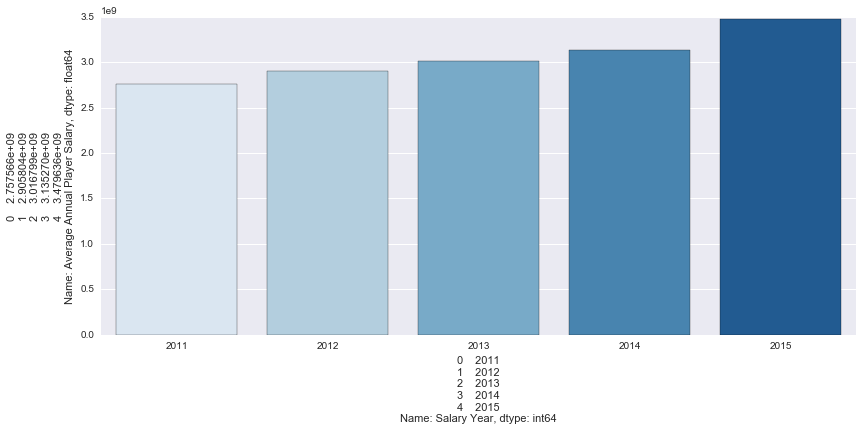

In [568]:
sns.factorplot(salaries_by_year['Salary Year'], salaries_by_year['Average Annual Player Salary'], data=df,kind="bar",palette="Blues",size=6,aspect=2,legend_out=False);


In [569]:
# Set position to prior year's
df['Position'] = df['Fielding_POS.1.Year-1']

# Add categorical value for multiple positions
df[df['Num Positions.Year-1'] > 1]['Position'] = 'MULTIPLE'
df.head()

C:\Users\Owner\Anaconda3\envs\data_analysis\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Player Id,Salary Year,Annual Salary,Salary Team,Batting_2B.Year-1,Batting_3B.Year-1,Batting_AB.Year-1,Batting_AVG.Year-1,Batting_BB.Year-1,Batting_CS.Year-1,...,teamID 1.Year-1,teamID 2.Year-1,teamID 3.Year-1,teamID 4.Year-1,Log Annual Salary,Average Annual Player Salary,Scaled Salary,Pitching_Career_WPIP,Pitching_Career_GSPFGP,Position
0,blanche01,2011,1000000,ARI,5.0,0.0,130.0,0.215385,11.0,0.0,...,NYN,NaN,NaN,NaN,13.815511,3.379370e+06,0.295913,NaN,NaN,C
1,bloomwi01,2011,900000,ARI,10.0,1.0,187.0,0.267380,9.0,5.0,...,CIN,KCA,NaN,NaN,13.710150,3.379370e+06,0.266322,NaN,NaN,1B
2,blumge01,2011,1350000,ARI,10.0,1.0,202.0,0.267327,15.0,0.0,...,HOU,NaN,NaN,NaN,14.115615,3.379370e+06,0.399483,NaN,NaN,3B
3,branyru01,2011,1000000,ARI,19.0,0.0,376.0,0.236702,46.0,0.0,...,SEA,CLE,NaN,NaN,13.815511,3.379370e+06,0.295913,NaN,NaN,1B
4,demelsa01,2011,417000,ARI,0.0,0.0,0.0,NaN,0.0,0.0,...,ARI,NaN,NaN,NaN,12.940842,3.379370e+06,0.123396,0.006006,0.0,P


In [525]:
df.loc[df['Num Positions.Year-1'] > 1, 'Position'] = 'MULTIPLE'
df.head()

,Player Id,Salary Year,Annual Salary,Salary Team,Batting_2B.Year-1,Batting_3B.Year-1,Batting_AB.Year-1,Batting_AVG.Year-1,Batting_BB.Year-1,Batting_CS.Year-1,...,teamID 1.Year-1,teamID 2.Year-1,teamID 3.Year-1,teamID 4.Year-1,Log Annual Salary,Average Annual Player Salary,Scaled Salary,Pitching_Career_WPIP,Pitching_Career_GSPFGP,Position
0,blanche01,2011,1000000,ARI,5.0,0.0,130.0,0.215385,11.0,0.0,...,NYN,NaN,NaN,NaN,13.815511,3.379370e+06,0.295913,NaN,NaN,C
1,bloomwi01,2011,900000,ARI,10.0,1.0,187.0,0.267380,9.0,5.0,...,CIN,KCA,NaN,NaN,13.710150,3.379370e+06,0.266322,NaN,NaN,MULTIPLE
2,blumge01,2011,1350000,ARI,10.0,1.0,202.0,0.267327,15.0,0.0,...,HOU,NaN,NaN,NaN,14.115615,3.379370e+06,0.399483,NaN,NaN,MULTIPLE
3,branyru01,2011,1000000,ARI,19.0,0.0,376.0,0.236702,46.0,0.0,...,SEA,CLE,NaN,NaN,13.815511,3.379370e+06,0.295913,NaN,NaN,1B
4,demelsa01,2011,417000,ARI,0.0,0.0,0.0,NaN,0.0,0.0,...,ARI,NaN,NaN,NaN,12.940842,3.379370e+06,0.123396,0.006006,0.0,P


In [526]:
# Add Start, End, Remaining years
#contract_years_df = df['Contract Years'].str.extract('(?P<num_years>[0-9]+)(\s+\((?P<start_year>[0-9]+\s*)-\s*(?P<end_year>[0-9]+))*\)')
#df['Contract Num Years'] = contract_years_df['num_years']
#df['Contract Start Year']
#df['Contract Num Years'] = contract_years_df['num_years']
#df['Start Year'] = contract_years_df['start_year']
#df

## Team Payrolls

In [527]:
team_payrolls_df = pd.read_csv(os.path.join("data", "db", "TeamPayrolls.csv"))
team_payrolls_df = team_payrolls_df.drop('Team', 1)
team_payrolls_df = team_payrolls_df.rename(index=str, columns={'Team (Abbreviated)' : 'Team'})
grouped_team_payrolls = team_payrolls_df.groupby('Year')
avg_annual_payrolls = grouped_team_payrolls.mean()
avg_annual_payrolls = avg_annual_payrolls.reset_index()
avg_annual_payrolls = avg_annual_payrolls.rename(columns={'Payroll' : 'Avg Payroll'}) 
avg_annual_payrolls = pd.DataFrame(avg_annual_payrolls.reset_index(), columns=['Year', 'Avg Payroll'])

team_payrolls_df = pd.merge(team_payrolls_df, avg_annual_payrolls, on=['Year'])
team_payrolls_df['Scaled Team Payroll'] = team_payrolls_df['Payroll'] / team_payrolls_df['Avg Payroll']
team_payrolls_df.head()

,Year,Team,Payroll,Average,Median,Avg Payroll,Scaled Team Payroll
0,2011,NYY,201689030,6722968.0,NaN,92991718,2.168892
1,2011,PHI,172976381,5765879.0,NaN,92991718,1.860127
2,2011,BOS,161407476,5978055.0,NaN,92991718,1.735719
3,2011,LAA,138998524,4483823.0,NaN,92991718,1.494741
4,2011,CWS,129285539,4788353.0,NaN,92991718,1.390291


In [528]:
df = df.rename(index=str, columns={'Salary Team' : 'Team',
                              'Salary Year' : 'Year'})
# Merge with df
df = pd.merge(df, team_payrolls_df, on=['Team', 'Year'])
df = df.rename(index=str, columns={'Payroll' : 'Team Payroll'})
df.head()

,Player Id,Year,Annual Salary,Team,Batting_2B.Year-1,Batting_3B.Year-1,Batting_AB.Year-1,Batting_AVG.Year-1,Batting_BB.Year-1,Batting_CS.Year-1,...,Average Annual Player Salary,Scaled Salary,Pitching_Career_WPIP,Pitching_Career_GSPFGP,Position,Team Payroll,Average,Median,Avg Payroll,Scaled Team Payroll
0,blanche01,2011,1000000,ARI,5.0,0.0,130.0,0.215385,11.0,0.0,...,3.379370e+06,0.295913,NaN,NaN,C,53639833,1986660.0,NaN,92991718,0.576824
1,bloomwi01,2011,900000,ARI,10.0,1.0,187.0,0.267380,9.0,5.0,...,3.379370e+06,0.266322,NaN,NaN,MULTIPLE,53639833,1986660.0,NaN,92991718,0.576824
2,blumge01,2011,1350000,ARI,10.0,1.0,202.0,0.267327,15.0,0.0,...,3.379370e+06,0.399483,NaN,NaN,MULTIPLE,53639833,1986660.0,NaN,92991718,0.576824
3,branyru01,2011,1000000,ARI,19.0,0.0,376.0,0.236702,46.0,0.0,...,3.379370e+06,0.295913,NaN,NaN,1B,53639833,1986660.0,NaN,92991718,0.576824
4,demelsa01,2011,417000,ARI,0.0,0.0,0.0,NaN,0.0,0.0,...,3.379370e+06,0.123396,0.006006,0.0,P,53639833,1986660.0,NaN,92991718,0.576824


## Top 10 Highest Paid Players

In [529]:
# Biggest Salaries
df = df.sort(columns=['Scaled Salary'], ascending=False)
top_ten = df[:10]
top_ten[['Player Id', 'Year', 'Annual Salary', 'Scaled Salary', 'Batting_Career_Num_Seasons', 'Pitching_Career_Num_Seasons', 'Position']]

C:\Users\Owner\Anaconda3\envs\data_analysis\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Player Id,Year,Annual Salary,Scaled Salary,Batting_Career_Num_Seasons,Pitching_Career_Num_Seasons,Position
270,wellsve01,2011,26187500,7.749226,12,0,MULTIPLE
776,wellsve01,2012,24187500,6.900478,13,0,MULTIPLE
315,mauerjo01,2011,23000000,6.806002,7,0,C
1395,leecl02,2013,25000000,6.596395,11,11,P
847,mauerjo01,2012,23000000,6.561695,8,0,MULTIPLE
708,fieldpr01,2012,23000000,6.561695,7,0,1B
2230,verlaju01,2015,28000000,6.517923,10,10,P
1899,leecl02,2014,25000000,6.315247,12,12,P
1897,howarry01,2014,25000000,6.315247,10,0,1B
591,gonzaad01,2012,21857142,6.235648,8,0,MULTIPLE


In [530]:
df[df['Player Id'] == 'magonzalez']

,Player Id,Year,Annual Salary,Team,Batting_2B.Year-1,Batting_3B.Year-1,Batting_AB.Year-1,Batting_AVG.Year-1,Batting_BB.Year-1,Batting_CS.Year-1,...,Average Annual Player Salary,Scaled Salary,Pitching_Career_WPIP,Pitching_Career_GSPFGP,Position,Team Payroll,Average,Median,Avg Payroll,Scaled Team Payroll


In [531]:
# Subset columns
df = pd.DataFrame(df, columns=['Player Id', 'Year', 'Annual Salary', 'Scaled Salary',
                               'Team Payroll', 'Scaled Team Payroll',
                               'Log Annual Salary', 'Contract Years', 'Position', 
                               'Batting_Career_Num_Seasons', 'Batting_Career_G', 'Batting_Career_AVG', 
                               'Batting_Career_PSN', 'Batting_Career_SB', 'Batting_Career_HR',
                               'Batting_Career_RBI', 
                               'Pitching_Career_Num_Seasons', 'Pitching_Career_G', 'Pitching_Career_ER',
                               'Pitching_Career_ERA', 'Pitching_Career_IP', 'Pitching_Career_SO',
                               'Pitching_Career_SHO', 'Pitching_Career_W', 'Pitching_Career_L',
                               'Pitching_Career_WPIP', 'Pitching_Career_GS', 'Pitching_Career_GSPFGP',
                               'Fielding_Career_Num_Seasons', 'Fielding_Career_G', 'Fielding_Career_FPCT', 
                               'Fielding_Career_A', 'Fielding_Career_PO', 'Fielding_Career_E'])
df.head()

,Player Id,Year,Annual Salary,Scaled Salary,Team Payroll,Scaled Team Payroll,Log Annual Salary,Contract Years,Position,Batting_Career_Num_Seasons,...,Pitching_Career_L,Pitching_Career_WPIP,Pitching_Career_GS,Pitching_Career_GSPFGP,Fielding_Career_Num_Seasons,Fielding_Career_G,Fielding_Career_FPCT,Fielding_Career_A,Fielding_Career_PO,Fielding_Career_E
270,wellsve01,2011,26187500,7.749226,138998524,1.494741,17.080793,NaN,MULTIPLE,12,...,0.0,NaN,0.0,NaN,12,2734.0,0.993572,65.0,3181.0,21.0
776,wellsve01,2012,24187500,6.900478,154485166,1.576027,17.001347,NaN,MULTIPLE,13,...,0.0,NaN,0.0,NaN,13,2989.0,0.993249,69.0,3462.0,24.0
315,mauerjo01,2011,23000000,6.806002,112737000,1.212334,16.951005,NaN,C,7,...,0.0,NaN,0.0,NaN,7,719.0,0.995706,250.0,4620.0,21.0
1395,leecl02,2013,25000000,6.596395,165385714,1.601155,17.034386,NaN,P,11,...,78.0,0.007497,280.0,0.151134,11,284.0,0.929461,152.0,72.0,17.0
847,mauerjo01,2012,23000000,6.561695,94085000,0.959836,16.951005,NaN,MULTIPLE,8,...,0.0,NaN,0.0,NaN,8,791.0,0.995165,279.0,5072.0,26.0


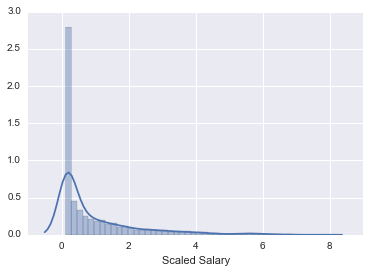

In [532]:
sns.distplot(df['Scaled Salary'])

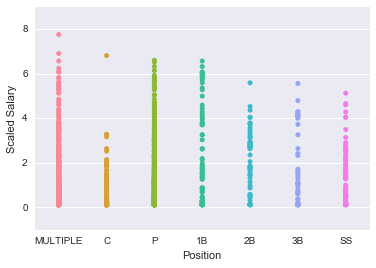

In [533]:
sns.stripplot(x="Position", y="Scaled Salary", data=df)


## Salary vs. Team Payroll

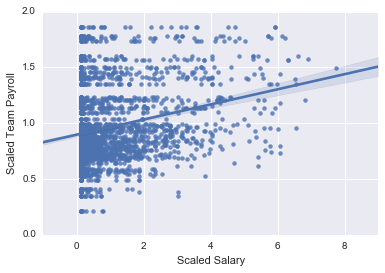

In [534]:
sns.regplot(x='Scaled Salary', y='Scaled Team Payroll', scatter=True, data=df)

In [535]:
df.corr()

,Year,Annual Salary,Scaled Salary,Team Payroll,Scaled Team Payroll,Log Annual Salary,Contract Years,Batting_Career_Num_Seasons,Batting_Career_G,Batting_Career_AVG,...,Pitching_Career_L,Pitching_Career_WPIP,Pitching_Career_GS,Pitching_Career_GSPFGP,Fielding_Career_Num_Seasons,Fielding_Career_G,Fielding_Career_FPCT,Fielding_Career_A,Fielding_Career_PO,Fielding_Career_E
Year,1.000000,0.044580,-0.019705,0.222227,-0.077461,0.044819,NaN,-0.027553,-0.024388,-0.034051,...,-0.008784,-0.035767,-0.007700,-0.024267,-0.025824,-0.016131,0.018093,-0.031760,-0.000904,-0.026363
Annual Salary,0.044580,1.000000,0.994197,0.248243,0.240488,0.879839,NaN,0.548984,0.538772,0.109322,...,0.298228,0.122813,0.341840,0.236238,0.550308,0.493347,0.069205,0.311251,0.396182,0.414470
Scaled Salary,-0.019705,0.994197,1.000000,0.237823,0.251542,0.878472,NaN,0.549578,0.539597,0.111849,...,0.297654,0.122031,0.341105,0.237795,0.550598,0.495739,0.069903,0.309742,0.394803,0.412772
Team Payroll,0.222227,0.248243,0.237823,1.000000,0.948671,0.205818,NaN,0.134476,0.104967,0.033801,...,0.061180,0.040884,0.078540,-0.028963,0.134546,0.082196,-0.040294,0.052322,0.077187,0.059986
Scaled Team Payroll,-0.077461,0.240488,0.251542,0.948671,1.000000,0.200061,NaN,0.147873,0.115727,0.044811,...,0.068395,0.054843,0.086010,-0.022016,0.147562,0.090978,-0.046712,0.062214,0.080273,0.068081
Log Annual Salary,0.044819,0.879839,0.878472,0.205818,0.200061,1.000000,NaN,0.658559,0.591090,0.083808,...,0.331338,0.130500,0.328358,0.193097,0.660099,0.540218,0.078296,0.329783,0.377624,0.429447
Contract Years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Batting_Career_Num_Seasons,-0.027553,0.548984,0.549578,0.134476,0.147873,0.658559,NaN,1.000000,0.790795,0.088995,...,0.386824,0.050136,0.328521,0.079137,0.998616,0.667664,0.080007,0.443672,0.462776,0.557855
Batting_Career_G,-0.024388,0.538772,0.539597,0.104967,0.115727,0.591090,NaN,0.790795,1.000000,0.340038,...,-0.134572,0.009655,-0.133669,-0.265656,0.786166,0.901682,0.175077,0.633707,0.702829,0.794041
Batting_Career_AVG,-0.034051,0.109322,0.111849,0.033801,0.044811,0.083808,NaN,0.088995,0.340038,1.000000,...,-0.324377,0.027603,-0.250637,0.059693,0.085903,0.339916,0.322084,0.241231,0.314250,0.311392


## Examine Pitchers



In [536]:
# Divide into quantiles
quantiles = pd.qcut(df['Scaled Salary'], 10, labels=['q' + str(x+1) for x in range(10)])
df['Salary Quantile'] = quantiles
#df[df['Salary Quantile'] == 'q10']

,Player Id,Year,Annual Salary,Scaled Salary,Team Payroll,Scaled Team Payroll,Log Annual Salary,Contract Years,Position,Batting_Career_Num_Seasons,...,Pitching_Career_WPIP,Pitching_Career_GS,Pitching_Career_GSPFGP,Fielding_Career_Num_Seasons,Fielding_Career_G,Fielding_Career_FPCT,Fielding_Career_A,Fielding_Career_PO,Fielding_Career_E,Salary Quantile
270,wellsve01,2011,26187500,7.749226,138998524,1.494741,17.080793,NaN,MULTIPLE,12,...,NaN,0.0,NaN,12,2734.0,0.993572,65.0,3181.0,21.0,q10
776,wellsve01,2012,24187500,6.900478,154485166,1.576027,17.001347,NaN,MULTIPLE,13,...,NaN,0.0,NaN,13,2989.0,0.993249,69.0,3462.0,24.0,q10
315,mauerjo01,2011,23000000,6.806002,112737000,1.212334,16.951005,NaN,C,7,...,NaN,0.0,NaN,7,719.0,0.995706,250.0,4620.0,21.0,q10
1395,leecl02,2013,25000000,6.596395,165385714,1.601155,17.034386,NaN,P,11,...,0.007497,280.0,0.151134,11,284.0,0.929461,152.0,72.0,17.0,q10
847,mauerjo01,2012,23000000,6.561695,94085000,0.959836,16.951005,NaN,MULTIPLE,8,...,NaN,0.0,NaN,8,791.0,0.995165,279.0,5072.0,26.0,q10
708,fieldpr01,2012,23000000,6.561695,132300000,1.349698,16.951005,NaN,1B,7,...,NaN,0.0,NaN,7,948.0,0.991877,516.0,7787.0,68.0,q10
2230,verlaju01,2015,28000000,6.517923,173813750,1.393777,17.147715,NaN,P,10,...,0.008538,298.0,0.150657,10,298.0,0.926431,218.0,122.0,27.0,q10
1899,leecl02,2014,25000000,6.315247,180052723,1.563881,17.034386,NaN,P,12,...,0.007442,311.0,0.149855,12,315.0,0.935018,180.0,79.0,18.0,q10
1897,howarry01,2014,25000000,6.315247,180052723,1.563881,17.034386,NaN,1B,10,...,NaN,0.0,NaN,10,1137.0,0.991083,637.0,9699.0,93.0,q10
591,gonzaad01,2012,21857142,6.235648,173186617,1.766815,16.900038,NaN,MULTIPLE,8,...,NaN,0.0,NaN,8,975.0,0.994774,786.0,7970.0,46.0,q10


In [537]:
pitchers = df[df['Pitching_Career_G'] > 100]
# Divide into quantiles
quantiles = pd.qcut(df['Scaled Salary'], 10, labels=['q' + str(x+1) for x in range(10)])
df['Salary Quantile'] = quantiles
top_pitchers = pitchers[pitchers['Salary Quantile'] == 'q10']
top_pitchers = pd.DataFrame(top_pitchers, columns=['Player Id', 'Salary Year', 'Annual Salary', 'Scaled Salary', 'Pitching_Career_G', 'Pitching_Career_ERA', 'Pitching_Career_IP', 'Pitching_Career_WPIP'])
top_pitchers[:10]

,Player Id,Salary Year,Annual Salary,Scaled Salary,Pitching_Career_G,Pitching_Career_ERA,Pitching_Career_IP,Pitching_Career_WPIP
1395,leecl02,NaN,25000000,6.596395,284.0,0.398884,16674.0,0.007497
2230,verlaju01,NaN,28000000,6.517923,298.0,0.391810,17802.0,0.008538
1899,leecl02,NaN,25000000,6.315247,315.0,0.390299,18678.0,0.007442
897,leecl02,NaN,21500000,6.133758,254.0,0.405076,14775.0,0.008054
364,hallaro01,NaN,20000000,5.918263,346.0,0.369124,20676.0,0.008174
2452,hernafe02,NaN,24857000,5.786286,303.0,0.341637,18546.0,0.006740
1951,hernafe02,NaN,22857000,5.773904,269.0,0.355133,16422.0,0.006698
724,verlaju01,NaN,20100000,5.734351,199.0,0.393056,11838.0,0.009039
892,hallaro01,NaN,20000000,5.705821,378.0,0.359147,22779.0,0.008253
1895,hamelco01,NaN,22500000,5.683722,245.0,0.375157,14370.0,0.006889


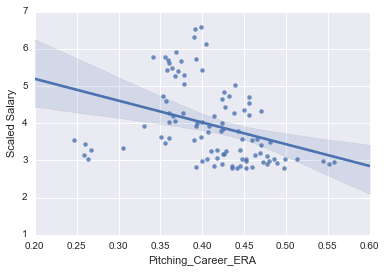

In [538]:
sns.regplot(x='Pitching_Career_ERA', y='Scaled Salary', scatter=True, data=top_pitchers)

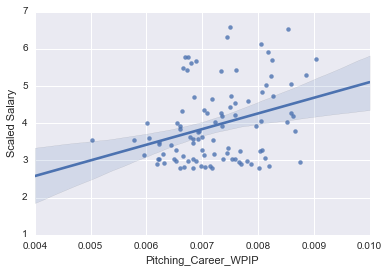

In [539]:
sns.regplot(x='Pitching_Career_WPIP', y='Scaled Salary', scatter=True, data=top_pitchers)

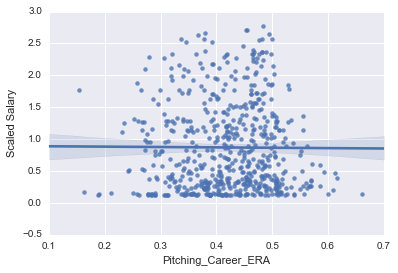

In [540]:
# All other pitchers?
sns.regplot(x='Pitching_Career_ERA', y='Scaled Salary', 
            scatter=True, 
            data=pitchers[pitchers['Salary Quantile'] != 'q10'])

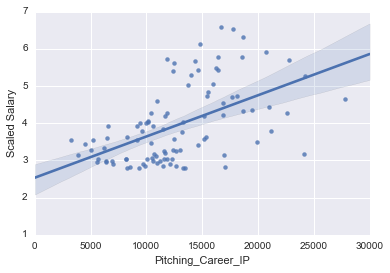

In [541]:
sns.regplot(x='Pitching_Career_IP', y='Scaled Salary', scatter=True, data=top_pitchers)

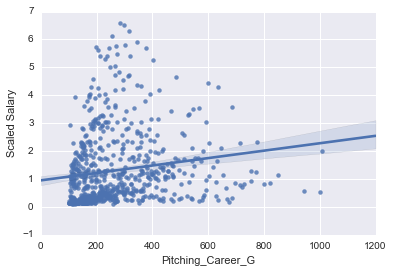

In [542]:
sns.regplot(x='Pitching_Career_G', y='Scaled Salary', scatter=True, data=pitchers)

In [559]:
pitching_df = pd.DataFrame(pitchers, columns=['Scaled Salary', 'Pitching_Career_WPIP', 'Pitching_Career_IP',
                                              'Pitching_Career_W', 'Pitching_Career_L', 'Pitching_Career_ERA', 'Pitching_Career_SO',
                                              'Pitching_Career_SHO', 'Pitching_Career_Num_Seasons', 'Pitching_Career_G',
                                              'Pitching_Career_GS', 'Pitching_Career_GSPFGP', 'Pitching_Career_ER'
                                             ])
pitching_df.corr()
                           

,Scaled Salary,Pitching_Career_WPIP,Pitching_Career_IP,Pitching_Career_W,Pitching_Career_L,Pitching_Career_ERA,Pitching_Career_SO,Pitching_Career_SHO,Pitching_Career_Num_Seasons,Pitching_Career_G,Pitching_Career_GS,Pitching_Career_GSPFGP,Pitching_Career_ER
Scaled Salary,1.000000,0.314944,0.644511,0.674705,0.558691,-0.059836,0.717439,0.630776,0.393604,0.155920,0.617136,0.475179,0.562665
Pitching_Career_WPIP,0.314944,1.000000,0.283727,0.389621,0.223890,-0.102961,0.305807,0.279434,0.113217,0.016555,0.295469,0.248058,0.247604
Pitching_Career_IP,0.644511,0.283727,1.000000,0.985380,0.968799,0.236678,0.960034,0.830341,0.755588,0.319752,0.960420,0.669157,0.984019
Pitching_Career_W,0.674705,0.389621,0.985380,1.000000,0.930762,0.187883,0.953997,0.851328,0.709849,0.282305,0.952141,0.656874,0.955793
Pitching_Career_L,0.558691,0.223890,0.968799,0.930762,1.000000,0.341702,0.916745,0.745131,0.760230,0.325548,0.937010,0.689266,0.983216
Pitching_Career_ERA,-0.059836,-0.102961,0.236678,0.187883,0.341702,1.000000,0.153576,0.110238,0.215981,-0.114914,0.309834,0.521277,0.361045
Pitching_Career_SO,0.717439,0.305807,0.960034,0.953997,0.916745,0.153576,1.000000,0.804384,0.739528,0.347830,0.910374,0.635471,0.922352
Pitching_Career_SHO,0.630776,0.279434,0.830341,0.851328,0.745131,0.110238,0.804384,1.000000,0.493722,0.071257,0.831443,0.547467,0.783282
Pitching_Career_Num_Seasons,0.393604,0.113217,0.755588,0.709849,0.760230,0.215981,0.739528,0.493722,1.000000,0.766876,0.587422,0.307581,0.754249
Pitching_Career_G,0.155920,0.016555,0.319752,0.282305,0.325548,-0.114914,0.347830,0.071257,0.766876,1.000000,0.056775,-0.231009,0.287708


Columns we could use for a model have a low correlation with each other and a high correlation with the variable we are predicting. Some candidates appear to be:

Pitching_Career_SO (or Pitching_Career_IP, Pitching_Career_GS)
Pitching_Career_ERA

We might want to look at quartiles and see if these relationships hold or are different. For example, ERA has a stronger effect for top pitchers than for all pitchers. 

What about fielding percentage and other fielding metrics? We'll look at that in the section below.

## Model just pitchers


In [544]:
from sklearn import linear_model
from sklearn import cross_validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GroupKFold

X = np.asarray(pd.DataFrame(pitchers, columns=['Pitching_Career_SO', 'Pitching_Career_ERA']))
y = np.asarray(pitchers['Scaled Salary'])
regr = linear_model.LinearRegression()

# Simple train/test split
x_train, x_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=55)
regr.fit(x_train, y_train)
score = regr.score(x_test, y_test)
print(score)

# K-fold group cross-validation
pitchers.sort(['Player Id'], inplace=True)
players = list(pitchers['Player Id'].values)

groups = [players.index(row['Player Id']) for index, row in pitchers.iterrows()]
score = cross_val_score(regr, X, y, groups, cv=GroupKFold(n_splits=5))



0.585377396415


C:\Users\Owner\Anaconda3\envs\data_analysis\lib\site-packages\ipykernel\__main__.py:17: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Users\Owner\Anaconda3\envs\data_analysis\lib\site-packages\pandas\core\frame.py:3225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  na_position=na_position)


## Examine Batting

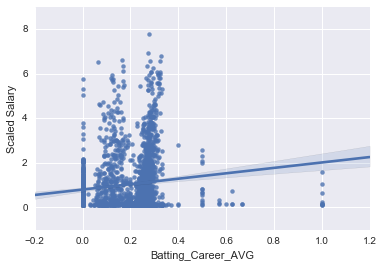

In [545]:
sns.regplot(x='Batting_Career_AVG', y='Scaled Salary', scatter=True, data=df)

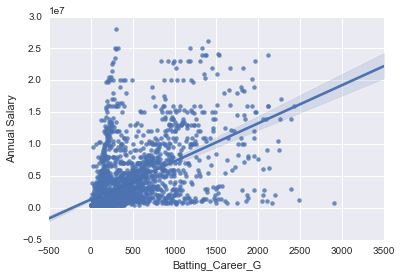

In [546]:
sns.regplot(x='Batting_Career_G', y='Annual Salary', scatter=True, data=df)

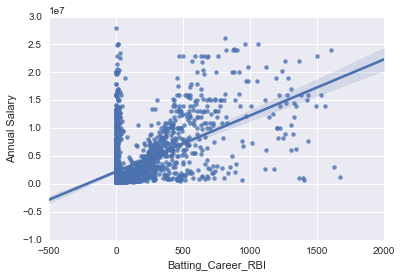

In [547]:
sns.regplot(x='Batting_Career_RBI', y='Annual Salary', scatter=True, data=df)

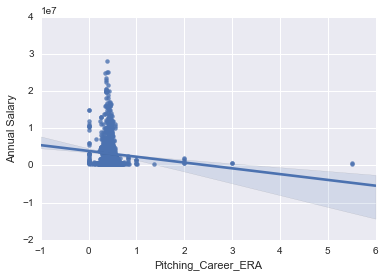

In [548]:
pitching_df = pd.DataFrame(df[df['Pitching_Career_G'] > 0])
sns.regplot(x='Pitching_Career_ERA', y='Annual Salary', scatter=True, data=df)

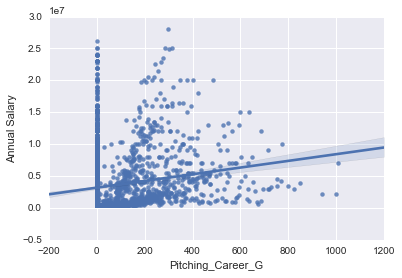

In [549]:
pitching_df = pd.DataFrame(df[df['Pitching_Career_G'] > 0])
sns.regplot(x='Pitching_Career_G', y='Annual Salary', scatter=True, data=df)

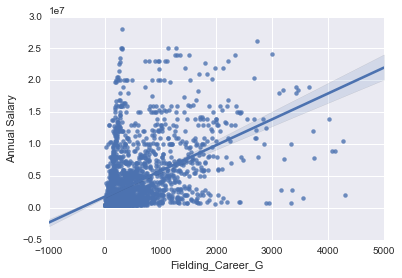

In [550]:
fielding_df = pd.DataFrame(df[df['Fielding_Career_G'] > 0])
sns.regplot(x='Fielding_Career_G', y='Annual Salary', scatter=True, data=df)

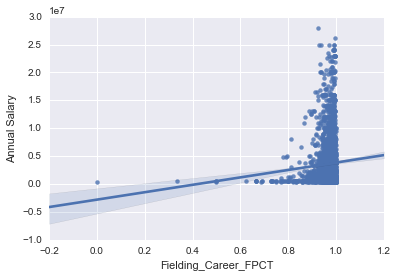

In [551]:
sns.regplot(x='Fielding_Career_FPCT', y='Annual Salary', scatter=True, data=df)

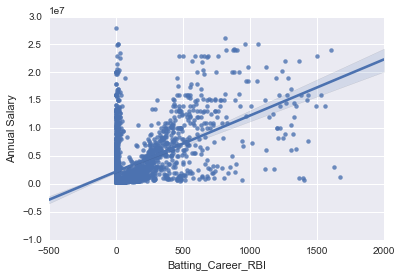

In [552]:
sns.regplot(x='Batting_Career_RBI', y='Annual Salary', scatter=True, data=df)
#batting_df['Batting_Career_RBI']

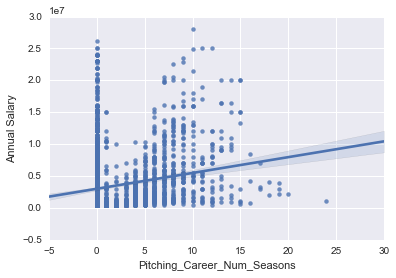

In [553]:
sns.regplot(x='Pitching_Career_Num_Seasons', y='Annual Salary', scatter=True, data=df)

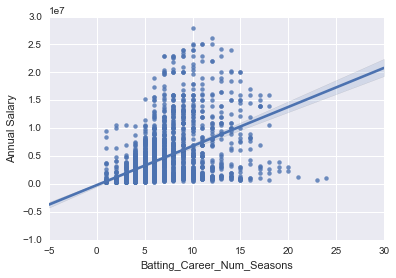

In [554]:
sns.regplot(x='Batting_Career_Num_Seasons', y='Annual Salary', scatter=True, data=df)

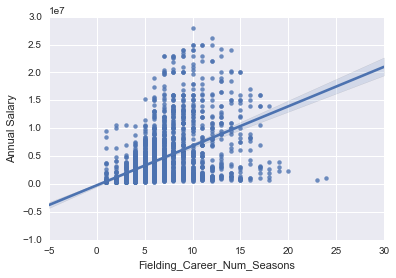

In [555]:
sns.regplot(x='Fielding_Career_Num_Seasons', y='Annual Salary', scatter=True, data=df)

In [564]:
df = pd.read_csv(os.path.join("data", "db", "Observations.csv"))

# Average Player Salary by year
df_gb_year = df.groupby('Salary Year')
counts = df_gb_year.count()
average_player_salaries = df_gb_year.sum()['Annual Salary'] / df_gb_year.count()['Annual Salary']
avg_player_salaries_df = average_player_salaries.reset_index()
avg_player_salaries_df.columns = ['Salary Year', 'Average Annual Player Salary']
df = pd.merge(df, avg_player_salaries_df, on='Salary Year')

df['Scaled Salary'] = df['Annual Salary'] / df['Average Annual Player Salary']

batting_df = df[df['Batting_Career_G'] > 100]
batting_df = pd.DataFrame(batting_df, columns=['Annual Salary', 'Batting_Career_AVG', 'Batting_Career_G',
                                               'Batting_Career_Num_Seasons',
                                               'Batting_Career_Max_AVG','Batting_Career_Min_AVG',
                                               'Batting_Career_Num_Seasons','Batting_Career_PSN','Batting_Career_RBI',
                                               'Batting_Career_SB', 'Batting_Career_H', 'Batting_Career_2B',
                                               'Batting_Career_3B', 'Batting_Career_HR',
                                               'Batting_Career_TB', 'Batting_Career_SLG', 'Batting_Career_OBP'
                                             ])
batting_df.describe()

batting_df.corr()

C:\Users\Owner\Anaconda3\envs\data_analysis\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Annual Salary,Batting_Career_AVG,Batting_Career_G,Batting_Career_Num_Seasons,Batting_Career_Max_AVG,Batting_Career_Min_AVG,Batting_Career_Num_Seasons,Batting_Career_PSN,Batting_Career_RBI,Batting_Career_SB,Batting_Career_H,Batting_Career_2B,Batting_Career_3B,Batting_Career_HR,Batting_Career_TB,Batting_Career_SLG,Batting_Career_OBP
Annual Salary,1.000000,0.066810,0.438748,0.452160,0.115649,0.001498,0.452160,0.463564,0.463304,0.295738,0.431796,0.436408,0.301530,0.471199,0.456127,0.120501,0.062580
Batting_Career_AVG,0.066810,1.000000,0.365603,0.013059,0.603651,0.782474,0.013059,0.385546,0.425188,0.305284,0.461585,0.458599,0.376021,0.369680,0.448099,0.898832,0.958720
Batting_Career_G,0.438748,0.365603,1.000000,0.713967,0.135330,0.324968,0.713967,0.729188,0.924999,0.614439,0.950152,0.940542,0.703222,0.849894,0.944953,0.434683,0.354585
Batting_Career_Num_Seasons,0.452160,0.013059,0.713967,1.000000,0.177052,-0.145887,1.000000,0.471006,0.528050,0.313303,0.530207,0.524914,0.354921,0.485357,0.529125,0.040242,0.010627
Batting_Career_Max_AVG,0.115649,0.603651,0.135330,0.177052,1.000000,0.263023,0.177052,0.030244,0.130147,0.083329,0.142111,0.139899,0.104622,0.109678,0.135985,0.501869,0.543715
Batting_Career_Min_AVG,0.001498,0.782474,0.324968,-0.145887,0.263023,1.000000,-0.145887,0.226401,0.398087,0.301233,0.440991,0.433102,0.378828,0.340770,0.424140,0.719570,0.770814
Batting_Career_Num_Seasons,0.452160,0.013059,0.713967,1.000000,0.177052,-0.145887,1.000000,0.471006,0.528050,0.313303,0.530207,0.524914,0.354921,0.485357,0.529125,0.040242,0.010627
Batting_Career_PSN,0.463564,0.385546,0.729188,0.471006,0.030244,0.226401,0.471006,1.000000,0.717944,0.787881,0.773018,0.750599,0.721615,0.670666,0.772211,0.421325,0.390449
Batting_Career_RBI,0.463304,0.425188,0.924999,0.528050,0.130147,0.398087,0.528050,0.717944,1.000000,0.530206,0.959224,0.972357,0.629699,0.967798,0.988383,0.529435,0.415445
Batting_Career_SB,0.295738,0.305284,0.614439,0.313303,0.083329,0.301233,0.313303,0.787881,0.530206,1.000000,0.676458,0.602935,0.850756,0.427246,0.620111,0.292663,0.278007


In [557]:
#df = pd.read_csv(os.path.join("data", "db", "Performance.csv"))
#print("Performance")
#print("# with H: {}".format(len(df[~df['Batting_H'].isnull()])))
#df.describe()
#df.head()

In [558]:
#batting_df = pd.read_csv(os.path.join("data", "lahman", "baseballdatabank-master", "core", "Batting.csv"))
#atting_df.describe()

In [572]:
df = pd.read_csv(os.path.join("data", "db", "Observations.csv"))

# Average Player Salary by year
df_gb_year = df.groupby('Salary Year')
counts = df_gb_year.count()
average_player_salaries = df_gb_year.sum()['Annual Salary'] / df_gb_year.count()['Annual Salary']
avg_player_salaries_df = average_player_salaries.reset_index()
avg_player_salaries_df.columns = ['Salary Year', 'Average Annual Player Salary']
df = pd.merge(df, avg_player_salaries_df, on='Salary Year')

df['Scaled Salary'] = df['Annual Salary'] / df['Average Annual Player Salary']

fielding_df = pd.DataFrame(df, columns=['Annual Salary', 'Fielding_Career_PO', 'Fielding_Career_A', 'Fielding_Career_E',
                                                'Fielding_Career_FPCT', 'Fielding_Career_G', 'Fielding_Career_Num_Seasons'])
fielding_df.describe()

C:\Users\Owner\Anaconda3\envs\data_analysis\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Annual Salary,Fielding_Career_PO,Fielding_Career_A,Fielding_Career_E,Fielding_Career_FPCT,Fielding_Career_G,Fielding_Career_Num_Seasons
count,4.043000e+03,4043.000000,4043.000000,4043.000000,4028.000000,4043.000000,4043.000000
mean,3.783100e+06,856.667821,331.321543,19.607717,0.967246,472.842444,5.542666
std,5.008263e+06,1792.783818,770.632286,33.441915,0.045382,614.509778,3.777698
min,4.140000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.085000e+05,15.500000,17.000000,2.000000,NaN,88.000000,3.000000
50%,1.400000e+06,89.000000,55.000000,6.000000,NaN,232.000000,5.000000
75%,5.000000e+06,963.500000,209.000000,21.000000,NaN,600.000000,8.000000
max,3.257100e+07,17980.000000,7947.000000,272.000000,1.000000,4299.000000,24.000000


In [563]:
fielding_df.corr()

,Annual Salary,Fielding_Career_PO,Fielding_Career_A,Fielding_Career_E,Fielding_Career_FPCT,Fielding_Career_G,Fielding_Career_Num_Seasons
Annual Salary,1.000000,0.384247,0.300413,0.413580,0.059322,0.497145,0.552430
Fielding_Career_PO,0.384247,1.000000,0.290864,0.506811,0.210184,0.606464,0.452447
Fielding_Career_A,0.300413,0.290864,1.000000,0.864432,0.079120,0.413912,0.439452
Fielding_Career_E,0.413580,0.506811,0.864432,1.000000,0.084588,0.624530,0.552326
Fielding_Career_FPCT,0.059322,0.210184,0.079120,0.084588,1.000000,0.178023,0.057610
Fielding_Career_G,0.497145,0.606464,0.413912,0.624530,0.178023,1.000000,0.664770
Fielding_Career_Num_Seasons,0.552430,0.452447,0.439452,0.552326,0.057610,0.664770,1.000000


## All Star Appearances

In [570]:
df.head()

,Player Id,Salary Year,Annual Salary,Salary Team,Batting_2B.Year-1,Batting_3B.Year-1,Batting_AB.Year-1,Batting_AVG.Year-1,Batting_BB.Year-1,Batting_CS.Year-1,...,teamID 1.Year-1,teamID 2.Year-1,teamID 3.Year-1,teamID 4.Year-1,Log Annual Salary,Average Annual Player Salary,Scaled Salary,Pitching_Career_WPIP,Pitching_Career_GSPFGP,Position
0,blanche01,2011,1000000,ARI,5.0,0.0,130.0,0.215385,11.0,0.0,...,NYN,NaN,NaN,NaN,13.815511,3.379370e+06,0.295913,NaN,NaN,C
1,bloomwi01,2011,900000,ARI,10.0,1.0,187.0,0.267380,9.0,5.0,...,CIN,KCA,NaN,NaN,13.710150,3.379370e+06,0.266322,NaN,NaN,1B
2,blumge01,2011,1350000,ARI,10.0,1.0,202.0,0.267327,15.0,0.0,...,HOU,NaN,NaN,NaN,14.115615,3.379370e+06,0.399483,NaN,NaN,3B
3,branyru01,2011,1000000,ARI,19.0,0.0,376.0,0.236702,46.0,0.0,...,SEA,CLE,NaN,NaN,13.815511,3.379370e+06,0.295913,NaN,NaN,1B
4,demelsa01,2011,417000,ARI,0.0,0.0,0.0,NaN,0.0,0.0,...,ARI,NaN,NaN,NaN,12.940842,3.379370e+06,0.123396,0.006006,0.0,P


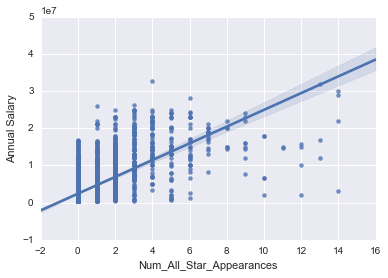

In [571]:
sns.regplot(x='Num_All_Star_Appearances', y='Annual Salary', scatter=True, data=df)

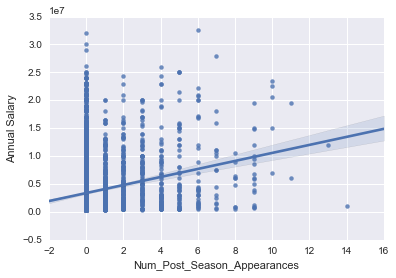

In [573]:
sns.regplot(x='Num_Post_Season_Appearances', y='Annual Salary', scatter=True, data=df)